In [50]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [52]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [53]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [54]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Extract all columns as features, including the target column
all_columns = df_market_data.columns
features = df_market_data[all_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform all columns
features_scaled = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(features_scaled, columns=all_columns, index=features.index)

# Display the first five rows of the scaled DataFrame
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [55]:
df_scaled_with_names = df_scaled.copy()  # Copy the scaled DataFrame
df_scaled_with_names.index.name = 'coin_id'  # Set the index name to 'coin_id'

# Display a sample of the scaled DataFrame with the "coin_id" as index
df_scaled_with_names.sample(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
neo,0.286546,-0.326301,-1.212670,-0.903134,0.290970,-0.181187,-0.175550
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
ftx-token,0.414711,0.414044,-0.047386,-0.465380,0.128185,-0.416502,-0.145469
wrapped-bitcoin,0.515453,0.461843,0.769975,0.224045,-0.074674,-0.355054,-0.251623
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747


---

### Find the Best Value for k Using the Original Data.

In [56]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [57]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia_values.append(kmeans.inertia_)

c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [58]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

In [59]:
elbow_df

,k_values,inertia_values
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.220364
5,6,52.829819
6,7,43.786435
7,8,37.527740
8,9,33.070926
9,10,28.989073


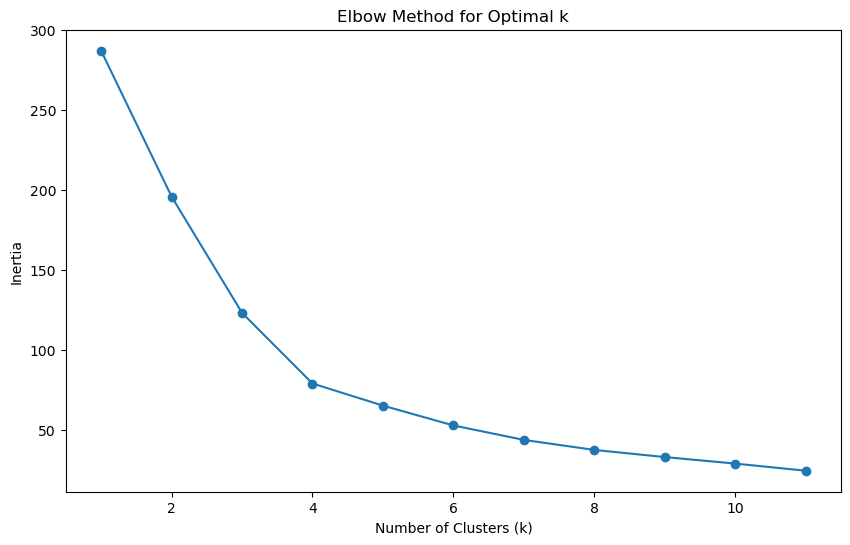

In [60]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_data['k_values'], elbow_data['inertia_values'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** After analyzing the elbow curve, we observe that the inertia values decrease significantly up to k=3, but the rate of decrease becomes less pronounced beyond that point. The point where this decrease slows down, forming a noticeable elbow in the curve, is often considered the optimal value for k. In this case, the visual inspection suggests that the elbow occurs at k=4, indicating that four clusters provide a good balance between capturing the structure in the data and avoiding overfitting.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [61]:
# Initialize the K-Means model using the best value for k
best_k = 4

kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [62]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled_with_names)

c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [63]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(df_scaled_with_names)

# Print the resulting array of cluster values.
clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [64]:
# Create a copy of the DataFrame
df_clustered = df_market_data.copy()

In [65]:
# Add a new column to the DataFrame with the predicted clusters
df_clustered['cluster'] = clusters

# Display sample data
df_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [66]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_clustered.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d',  
    c='cluster',  
    cmap='viridis',  
    hover_cols=['coin_id'], 
    title=f'K-means Clustering (k={best_k})',
    xlabel='price_change_percentage_24h',
    ylabel='price_change_percentage_7d',
    width=800,
    height=600
)


scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [67]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3
pca = PCA(n_components=n_components)

In [68]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled_with_names)
# View the first five rows of the DataFrame. 
df_pca = pd.DataFrame(data=pca_data, columns=[f'PC{i + 1}' for i in range(n_components)])
df_pca['coin_id'] = df_scaled_with_names.index
df_pca.set_index('coin_id', inplace=True)

# View the first five rows of the DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [69]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
for i in range(n_components):
    print(f'Explained Variance (PC{i + 1}): {explained_variance[i]:.4f}')

Explained Variance (PC1): 0.3720
Explained Variance (PC2): 0.3470
Explained Variance (PC3): 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance=0.3720+0.3470+0.1760=0.8950

So, the total explained variance of the three principal components is 0.8950, or 89.50%. This indicates that these three principal components capture approximately 89.50% of the total variance in the original data.

In [70]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(data=pca_data, columns=[f'PC{i + 1}' for i in range(n_components)])

# Copy the 'coin_id' values from the index of df_scaled_with_names
crypto_names = df_scaled_with_names.index.to_series()

# Set the "coin_id" column as the index for both DataFrames
df_pca_with_names = df_pca.copy()
df_pca_with_names.index = crypto_names

# Display sample data
df_pca_with_names.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [71]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [72]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(df_pca_with_names)
    inertia_values_pca.append(kmeans_pca.inertia_)

c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [73]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k_values': k_values, 'inertia_values': inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca

,k_values,inertia_values
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.091637
8,9,13.667065
9,10,10.559358


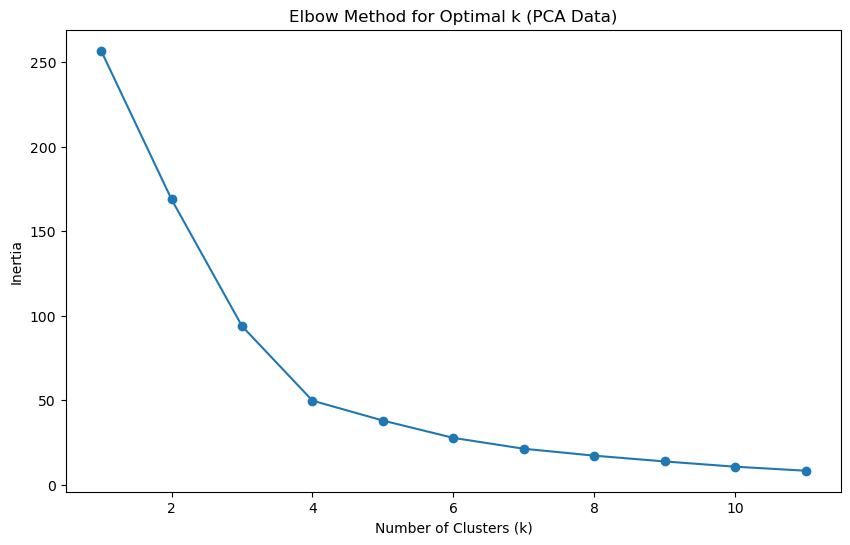

In [74]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_data_pca['k_values'], elbow_data_pca['inertia_values'], marker='o')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
Once again, the visual inspection suggests that the elbow occurs at k=4, indicating that four clusters provide a good balance between capturing the structure in the data and avoiding overfitting.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
No, the visual indication where the rate of decrease in inertia slows down is also at k=4 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [75]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42)

In [76]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)

c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [77]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(df_pca)
# Print the resulting array of cluster values.
clusters_pca

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0])

In [78]:
# Create a copy of the DataFrame with the PCA data
df_clustered_pca = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_clustered_pca['cluster'] = clusters_pca

# Display sample data
df_clustered_pca

,PC1,PC2,PC3,cluster
0,-0.600667,0.842760,0.461595,3
1,-0.458261,0.458466,0.952877,3
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,3
5,-0.516534,1.388377,0.804071,3
6,-0.450711,0.517699,2.846143,3
7,-0.345600,0.729439,1.478013,3
8,-0.649468,0.432165,0.600303,3
9,-0.759014,-0.201200,-0.217653,0


In [79]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = df_clustered_pca.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',  # Color the graph points with the labels found using K-means
    cmap='viridis',  # You can choose a different colormap
    hover_cols=['coin_id'],  # Add the "coin_id" column in the hover_cols parameter
    title=f'K-means Clustering on PCA Data (k={best_k_pca})',
    xlabel='PC1',
    ylabel='PC2',
    width=800,
    height=600
)

# Display the scatter plot
scatter_plot_pca

:Scatter   [PC1]   (PC2,cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

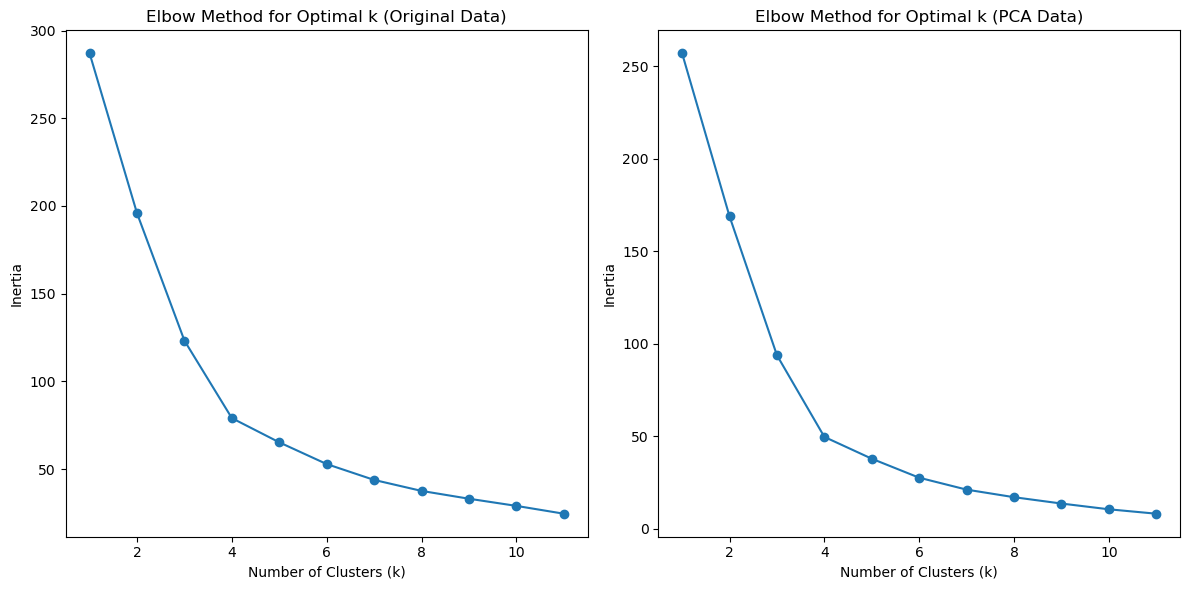

In [83]:
# Composite plot to contrast the Elbow curves

# Plotting the Elbow curve for the original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o')
plt.title('Elbow Method for Optimal k (Original Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting the Elbow curve for the PCA data
plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca['k_values'], df_elbow_pca['inertia_values'], marker='o')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Adjust layout for better visualization
plt.tight_layout()

# Show the composite plot
plt.show()

In [85]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

# Plotting the clustered data for the original data using hvPlot
scatter_plot_original = df_clustered.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',  # Color the graph points with the labels found using K-means
    cmap='viridis',  # You can choose a different colormap
    hover_cols=['coin_id'],  # Add the "coin_id" column in the hover_cols parameter
    title=f'K-means Clustering on Original Data (k={best_k})',
    xlabel='PC1',
    ylabel='PC2',
    width=400,
    height=600
)

# Plotting the clustered data for the PCA data using hvPlot
scatter_plot_pca = df_clustered_pca.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',  # Color the graph points with the labels found using K-means
    cmap='viridis',  # You can choose a different colormap
    hover_cols=['coin_id'],  # Add the "coin_id" column in the hover_cols parameter
    title=f'K-means Clustering on PCA Data (k={best_k_pca})',
    xlabel='PC1',
    ylabel='PC2',
    width=400,
    height=600)

# Display the composite plot
(scatter_plot_original + scatter_plot_pca).cols(2)

c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\holoviews\plotting\bokeh\plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
c:\Users\deebn\anaconda3\envs\PythonData_2023_08\Lib\site-packages\holoviews\plotting\bokeh\plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,cluster)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features has caused the clusters are shown to be much closer together, suggesting that the PCA may not adequately represent the variability in the original data.